# SISTEMA DE RECONHECIMENTO DE LÍNGUA DE SINAIS

## Importando as bibliotecas necessárias

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

## Construindo a rede neural

### Inicialização

In [2]:
model = Sequential()


### Primeira camada de convolução e pooling

In [3]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))

In [4]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [5]:
model.add(Dropout(0.25))

### Segunda camada de convolução e pooling

In [6]:
model.add(Convolution2D(32, (3, 3), activation='relu'))

In [7]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Terceira camada de convolução e pooling

In [8]:
model.add(Convolution2D(64, (3, 3), activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Quarta camada de convolução e pooling

In [10]:
model.add(Convolution2D(64, (3, 3), activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Convertendo as matrizes em arrays

In [12]:
model.add(Flatten())

### Camada totalmente conectada

In [13]:
model.add(Dense(units=512, activation='relu'))

In [14]:
model.add(Dense(units=7, activation='softmax'))

### Compilando o modelo

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Preparando os dados para treino

### Constroi um conjunto de dados com arquivos de imagem (treino)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=25)


### Constroi um conjunto de dados com arquivos de imagem (teste)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Definindo localização e formato das imagens para treino

In [18]:
training_set = train_datagen.flow_from_directory('dataset/treino',
                                                 target_size=(64, 64),
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 3518 images belonging to 7 classes.


### Definindo localização e formato das imagens para teste


In [19]:
test_set = test_datagen.flow_from_directory('dataset/teste',
                                            target_size=(64, 64),
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 2159 images belonging to 7 classes.


### Definindo os parametros de aprendizagem


In [20]:
history = model.fit(
        training_set,     
        epochs=15,
        validation_data=test_set)

Epoch 1/15
110/110 [==============================] - 6s 35ms/step - loss: 1.8164 - accuracy: 0.2607 - val_loss: 1.4980 - val_accuracy: 0.4108
Epoch 2/15
110/110 [==============================] - 3s 27ms/step - loss: 1.2391 - accuracy: 0.5276 - val_loss: 1.0159 - val_accuracy: 0.6123
Epoch 3/15
110/110 [==============================] - 3s 29ms/step - loss: 0.7587 - accuracy: 0.7078 - val_loss: 1.2041 - val_accuracy: 0.6633
Epoch 4/15
110/110 [==============================] - 3s 30ms/step - loss: 0.4549 - accuracy: 0.8294 - val_loss: 0.5439 - val_accuracy: 0.8536
Epoch 5/15
110/110 [==============================] - 4s 33ms/step - loss: 0.2679 - accuracy: 0.9107 - val_loss: 0.6498 - val_accuracy: 0.8546
Epoch 6/15
110/110 [==============================] - 5s 44ms/step - loss: 0.1932 - accuracy: 0.9335 - val_loss: 0.3778 - val_accuracy: 0.9189
Epoch 7/15
110/110 [==============================] - 4s 41ms/step - loss: 0.1384 - accuracy: 0.9557 - val_loss: 0.3626 - val_accuracy: 0.9189

## Gráficos de avaliação de resultado

In [21]:
import matplotlib.pyplot as plt

### Renderização de gráfico de acuracia

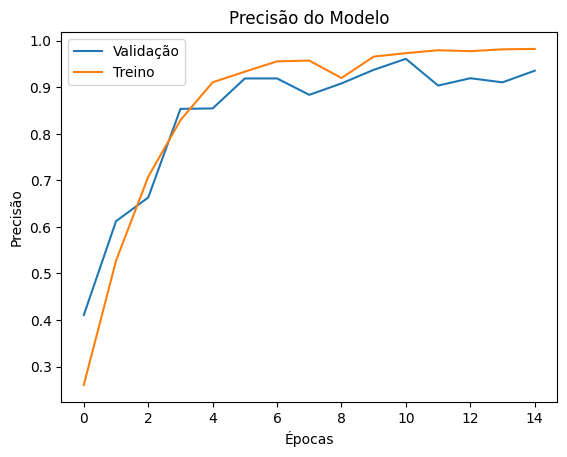

In [22]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend([ 'Validação','Treino'], loc='upper left')
plt.show()

### Renderização de gráfico de perda

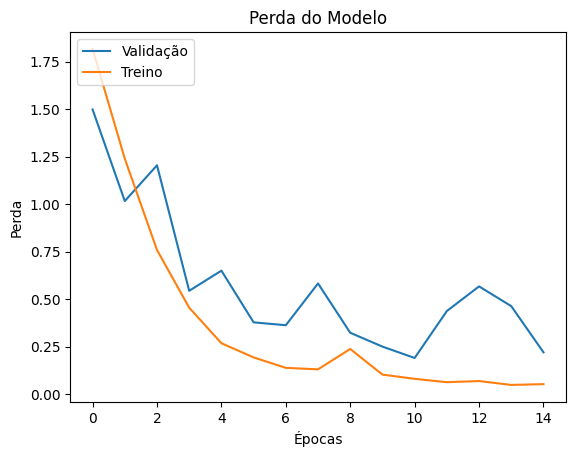

In [23]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend([ 'Validação','Treino'], loc='upper left')
plt.show()

### Salvando o modelo

In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Salvando os pesos

In [25]:
model.save_weights('model.h5')